In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df.sample(3)

,Survived,Age,Fare
882,0,22.0,10.5167
475,0,NaN,52.0000
571,1,53.0,51.4792


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
# fill null values in age column with mean 
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

# **Train Test Split ⚒️**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                     random_state=42)

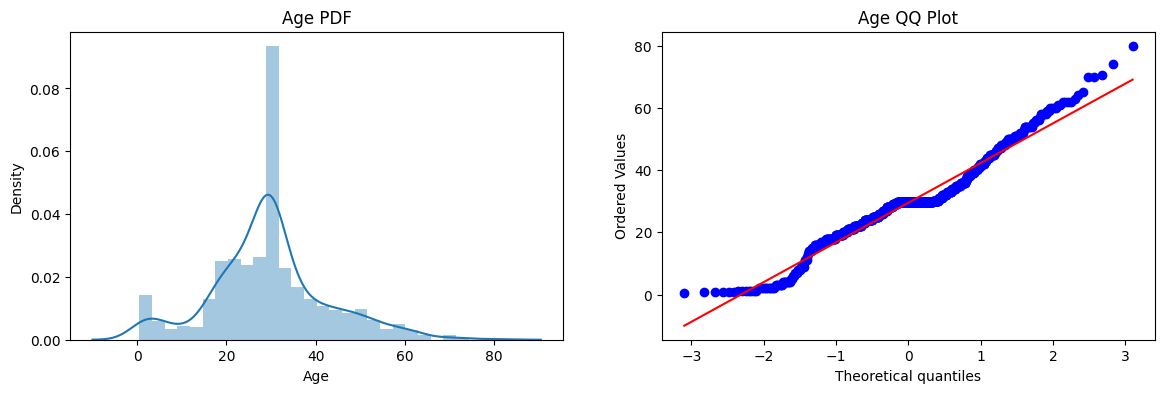

In [7]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

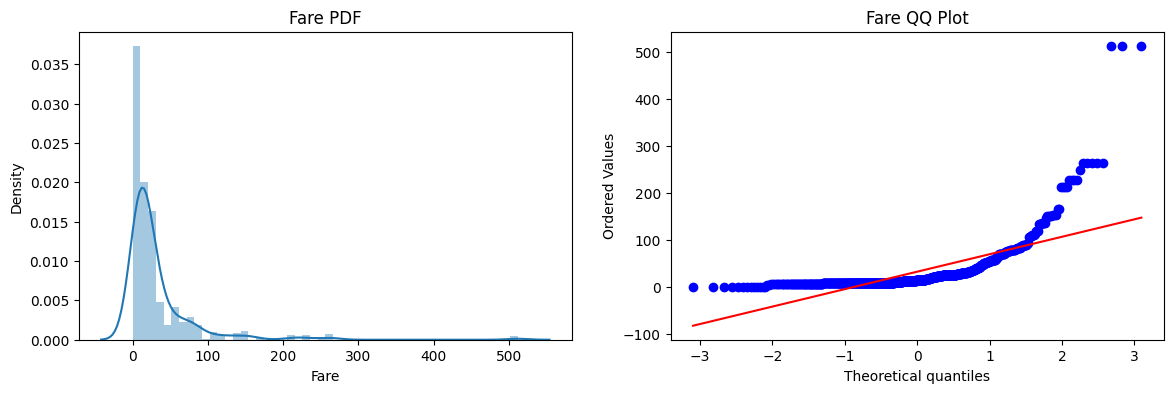

In [8]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ Plot')

plt.show()

# **Building Models to Predict ⚙️**

In [9]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [10]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy Score by LR Model:", accuracy_score(y_test, y_pred))
print("Accuracy Score by DTC Model:", accuracy_score(y_test, y_pred2))

Accuracy Score by LR Model: 0.6480446927374302
Accuracy Score by DTC Model: 0.6815642458100558


### **Results after FunctionTransformer**

In [11]:
trf = FunctionTransformer(func=np.log1p)

In [12]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy Score by LR Model:", accuracy_score(y_test, y_pred))
print("Accuracy Score by DTC Model:", accuracy_score(y_test, y_pred2))

Accuracy Score by LR Model: 0.6815642458100558
Accuracy Score by DTC Model: 0.6815642458100558


### **Diff in Fare and Age after FT**

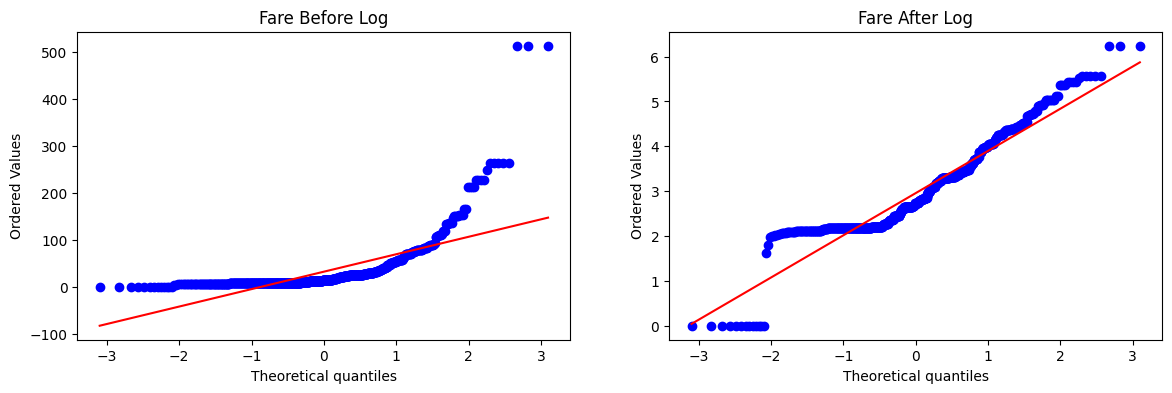

In [14]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare After Log')

plt.show()

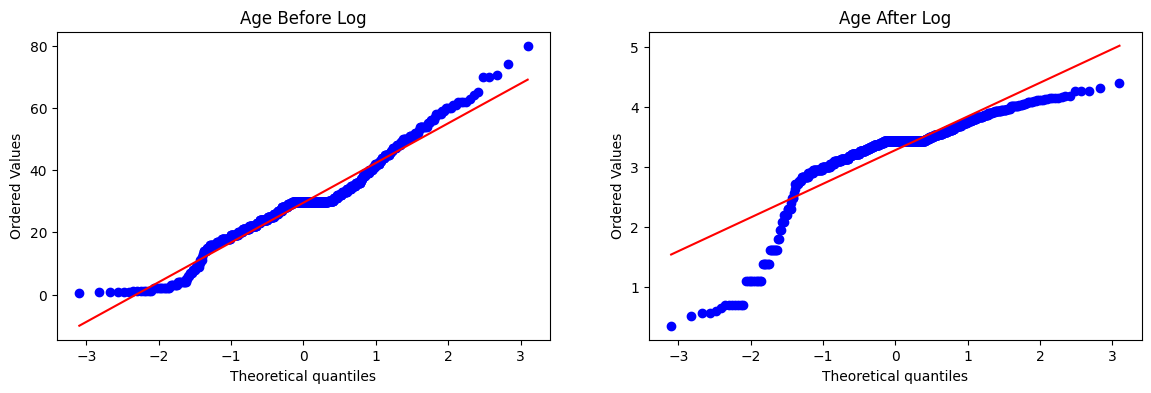

In [15]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age After Log')

plt.show()

## **Function to test any Mathematical Transformation 📈**

In [16]:
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    trf = ColumnTransformer([
        ('transform', FunctionTransformer(transform), ['Fare'])
        ], remainder='passthrough')

    X_transformed = trf.fit_transform(X)

    clf = LogisticRegression()

    print('Accuracy Score:', np.mean(cross_val_score(
        clf, X_transformed, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist='norm', plot=plt)
    plt.title('Fare Before transform')

    plt.subplot(122)
    stats.probplot(X_transformed[:, 0], dist='norm', plot=plt)
    plt.title('Fare After transform')

    plt.show()


Accuracy Score: 0.6442446941323345


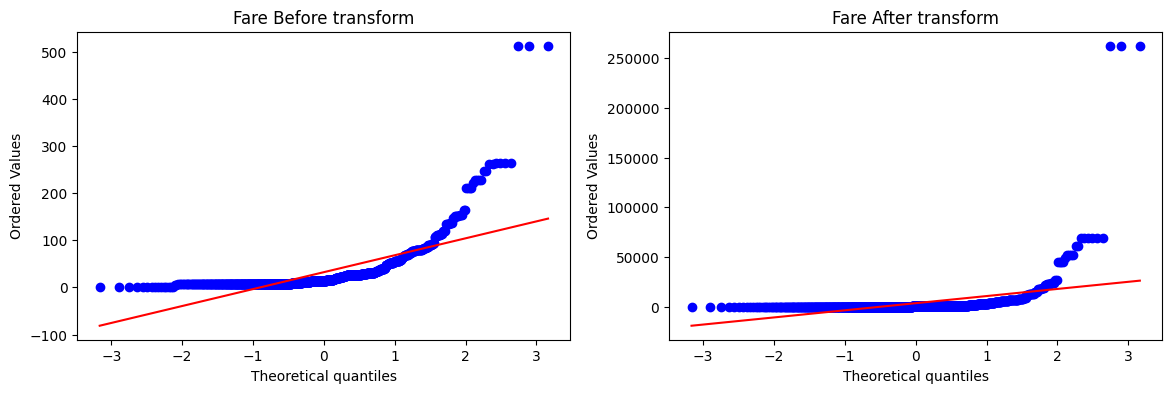

In [17]:
apply_transform(lambda x: x**2)

Accuracy Score: 0.6723845193508114


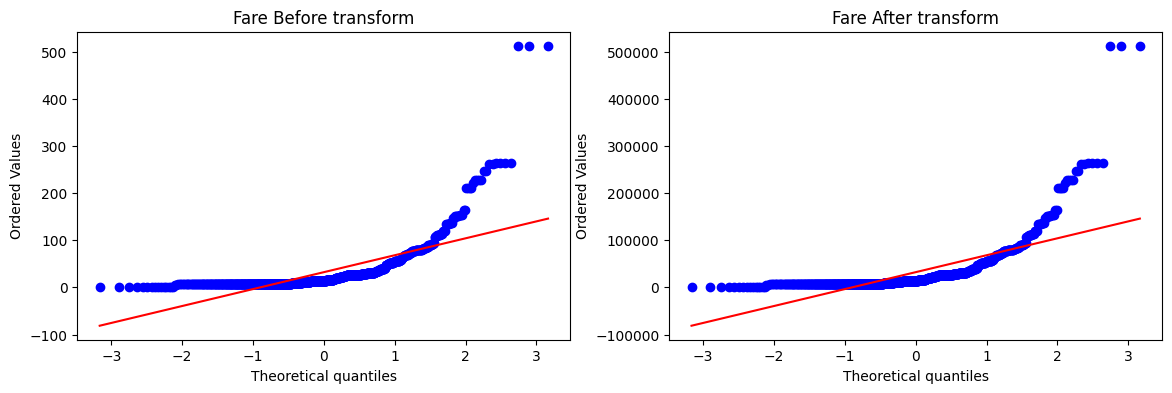

In [18]:
apply_transform(lambda x: x*1000)